<a href="https://colab.research.google.com/github/suryaprakash20/Internship-at-The-Sparks-Foundation/blob/main/Task_3_Exploratory_Data_Analysis_Retail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Exploratory Data Analysis - Retail 

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?


-- surya prakash.v

In [5]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('SampleSuperstore.csv') #Read the dataset

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 13)

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df1.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

We have found that there are some null values in our Postal Code Column

###### Let's find those rows

In [14]:
df["Postal Code"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Postal Code, Length: 9994, dtype: bool

###### As per google the postal code for the state Vermont is 5401 and let's fill it


In [15]:
df = df.drop(['Postal Code'],axis = 1) 

In [16]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Analyzing and Visualizing our Data

#### To get valuable insights

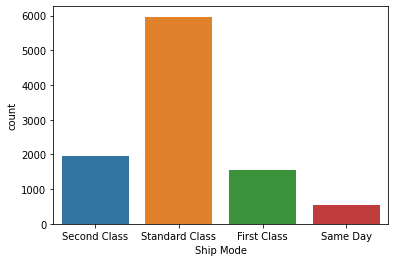

In [20]:
sns.countplot(x=df['Ship Mode'])

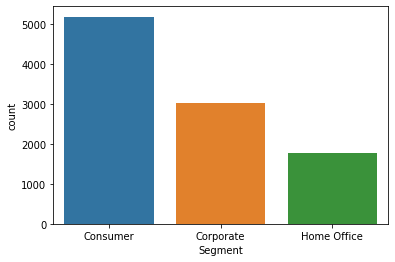

In [21]:
sns.countplot(x = 'Segment',data = df)

### Sales based on City

In [22]:
city = df.groupby("City").sum().sort_values("Sales", ascending = False).head(15)

In [23]:
city = city[["Sales"]].round(2)

city.reset_index(inplace = True)

In [24]:
city

,City,Sales
0,New York City,256368.16
1,Los Angeles,175851.34
2,Seattle,119540.74
3,San Francisco,112669.09
4,Philadelphia,109077.01
5,Houston,64504.76
6,Chicago,48539.54
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Springfield,43054.34


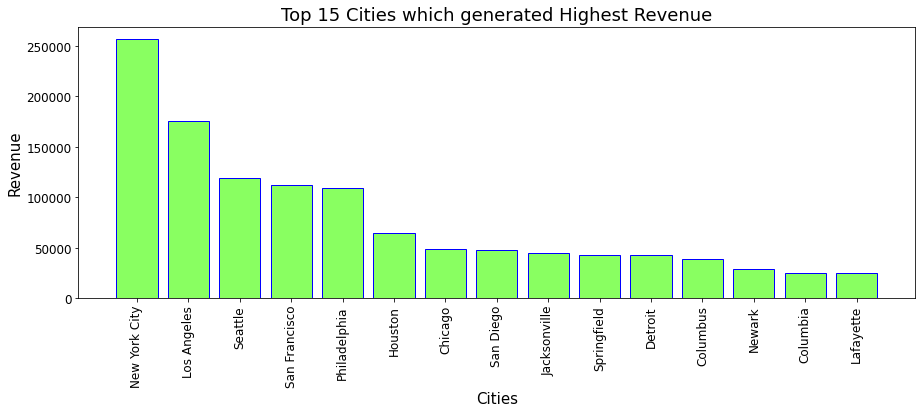

In [25]:
plt.figure(figsize = (15,5)) 

plt.title("Top 15 Cities which generated Highest Revenue", fontsize=18)

plt.bar(city["City"], city["Sales"],color= '#89ff61',edgecolor='blue', linewidth = 1)

plt.xlabel("Cities",fontsize=15)  

plt.ylabel("Revenue",fontsize=15)

plt.xticks(fontsize=12, rotation=90)

plt.yticks(fontsize=12)

plt.show()

### Sales Based on State

In [36]:
state = df.groupby("State").sum().sort_values("Sales", ascending = False).head(10)

state = state[["Sales"]].round(2)

state.reset_index(inplace = True)

state

,State,Sales
0,California,457687.63
1,New York,310876.27
2,Texas,170188.05
3,Washington,138641.27
4,Pennsylvania,116511.91
5,Florida,89473.71
6,Illinois,80166.10
7,Ohio,78258.14
8,Michigan,76269.61
9,Virginia,70636.72


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text major ticklabel objects>)

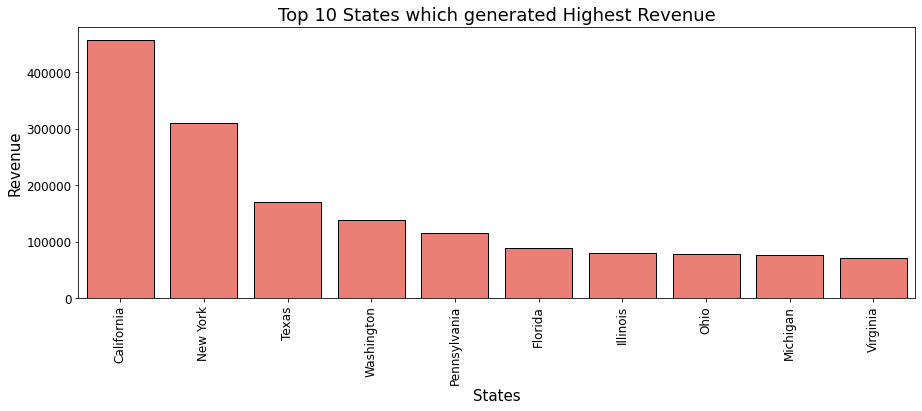

In [40]:
plt.figure(figsize = (15,5))

plt.title("Top 10 States which generated Highest Revenue", fontsize=18) 

sns.barplot(state["State"], state["Sales"],color= '#FF6F61',edgecolor='black', linewidth = 1)

plt.xlabel("States",fontsize=15) # x axis shows the States

plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue

plt.xticks(fontsize=12, rotation=90)

plt.yticks(fontsize=12)


### Sales based on Region

In [28]:
region = df.groupby("Region").sum()

region = region[["Sales"]].round(2)

region.reset_index(inplace = True)

region

,Region,Sales
0,Central,501239.89
1,East,678781.24
2,South,391721.91
3,West,725457.82


(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

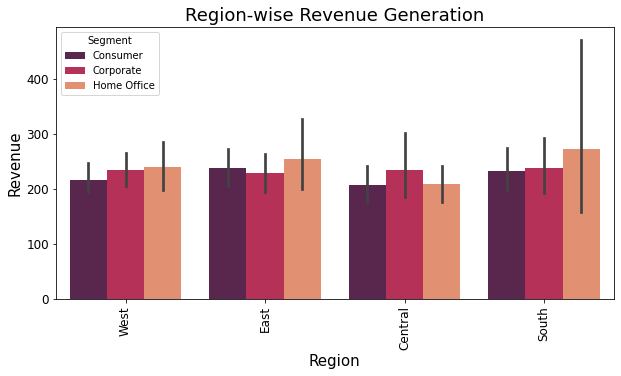

In [39]:
plt.figure(figsize = (10,5)) 

plt.title("Region-wise Revenue Generation", fontsize=18)

sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')

plt.xlabel("Region",fontsize=15) 

plt.ylabel("Revenue",fontsize=15) 

plt.xticks(fontsize=12, rotation=90)

plt.yticks(fontsize=12)


### Sales based on Ship mode

In [41]:
shipmode = df.groupby("Ship Mode").sum()

shipmode = shipmode[["Sales"]]

shipmode.reset_index(inplace = True)

shipmode

,Ship Mode,Sales
0,First Class,3.514284e+05
1,Same Day,1.283631e+05
2,Second Class,4.591936e+05
3,Standard Class,1.358216e+06


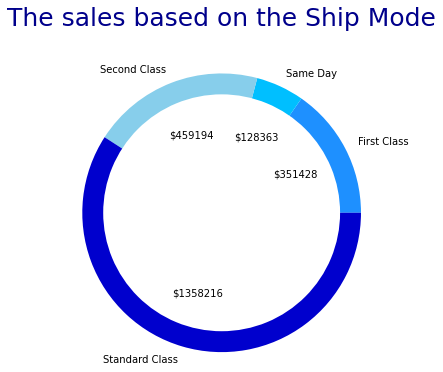

In [42]:
center = [6]
plt.figure(figsize = (6,6))

plt.pie(shipmode['Sales'], labels = shipmode['Ship Mode'],colors = ['#1E90FF','#00BFFF','#87CEEB',"mediumblue"], 
        radius = 2, autopct= make_autopct(shipmode["Sales"]))

plt.pie(center, radius = 1.7, colors = "w")

plt.title("The sales based on the Ship Mode", pad = 100, size = 25, color = "darkblue")

plt.tight_layout()
plt.show()

### Sales based on Categories

In [43]:
category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 

category = category[["Sales"]]

total_revenue_category = category["Sales"].sum()

total_revenue_category = str(int(total_revenue_category))

total_revenue_category = '$' + total_revenue_category

category.reset_index(inplace=True)

category

,Category,Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


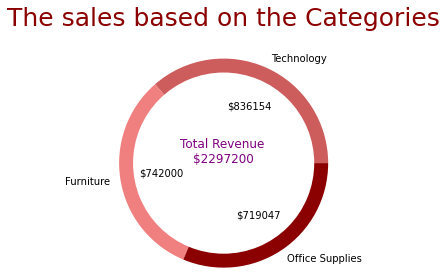

In [44]:
center = [6]
plt.pie(category['Sales'], labels = category['Category'],colors =  ["indianred","lightcoral", "darkred"], 
        radius = 1.5, autopct = make_autopct(category["Sales"]))

plt.pie(center, radius = 1.3, colors = "w")

plt.annotate('Total Revenue \n'+str(total_revenue_category),color = "purple", xy=(0, 0), fontsize=12, ha="center")

plt.title("The sales based on the Categories", pad = 50, size = 25, color = "darkred")

plt.tight_layout()
plt.show()

### Sales based on Sub-Categories

In [46]:
subca = df.groupby("Sub-Category").sum().sort_values("Sales" , ascending = False).head()

subca = subca[["Sales"]].round(2)

subca.reset_index(inplace = True)

subca

,Sub-Category,Sales
0,Phones,330007.05
1,Chairs,328449.10
2,Storage,223843.61
3,Tables,206965.53
4,Binders,203412.73


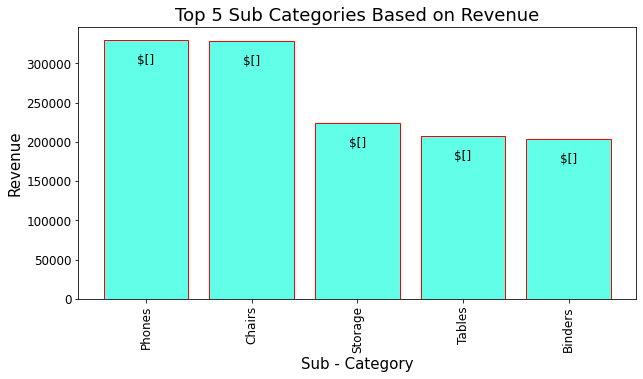

In [47]:
plt.figure(figsize = (10,5)) 

plt.title("Top 5 Sub Categories Based on Revenue", fontsize=18)

plt.bar(subca["Sub-Category"], subca["Sales"],color= '#61ffe7',edgecolor='Red', linewidth = 1)

plt.xlabel("Sub - Category",fontsize=15) 

plt.ylabel("Revenue",fontsize=15) 

plt.xticks(fontsize=12, rotation=90)

plt.yticks(fontsize=12)

for a,s in subca["Sales"].items(): 
        plt.text(a,s-30000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

### Choropleth Map

In [49]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [50]:
state = pd.DataFrame(state, state_code) 

state.reset_index(inplace=True)

state.columns = ['State Code','State']

state.head()

,State Code,State
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado


In [52]:
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)

sales.reset_index(inplace=True) 



sales.head(10)

,State,Sales,Quantity,Discount,Profit
0,California,457687.6315,7667,145.60,76381.3871
1,New York,310876.2710,4224,62.40,74038.5486
2,Texas,170188.0458,3724,364.64,-25729.3563
3,Washington,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,116511.9140,2153,192.90,-15559.9603
5,Florida,89473.7080,1379,114.65,-3399.3017
6,Illinois,80166.1010,1845,191.90,-12607.8870
7,Ohio,78258.1360,1759,152.40,-16971.3766
8,Michigan,76269.6140,946,1.80,24463.1876
9,Virginia,70636.7200,893,0.00,18597.9504


In [53]:
sales= sales.sort_values('State', ascending=True)

sales.reset_index(inplace = True)

sales.head()

,index,State,Sales,Quantity,Discount,Profit
0,26,Alabama,19510.6400,256,0.0,5786.8253
1,15,Arizona,35282.0010,862,68.0,-3427.9246
2,30,Arkansas,11678.1300,240,0.0,4008.6871
3,0,California,457687.6315,7667,145.6,76381.3871
4,17,Colorado,32108.1180,693,57.6,-6527.8579


In [54]:
sales.drop('index',1,inplace = True)

sales.insert(1, 'State Code', state['State Code'])

sales.head()

,State,State Code,Sales,Quantity,Discount,Profit
0,Alabama,AL,19510.6400,256,0.0,5786.8253
1,Arizona,AZ,35282.0010,862,68.0,-3427.9246
2,Arkansas,AR,11678.1300,240,0.0,4008.6871
3,California,CA,457687.6315,7667,145.6,76381.3871
4,Colorado,CO,32108.1180,693,57.6,-6527.8579


In [55]:
import plotly.graph_objects as go

sales['states'] = sales['State']
usa = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['states'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'darkmint', #some cool colors sunsetdark, plotly3, mint, bluyl, darkmint, aggrnyl, algae, blues, blugrn, dense, emrld
    colorbar_title = "Sales",
    
))

usa.update_layout(
    title_text = 'State wise Sales',
    geo_scope='usa', # limit map scope to USA
)

usa.show();


From the above Choropleth Map california has large no of sales

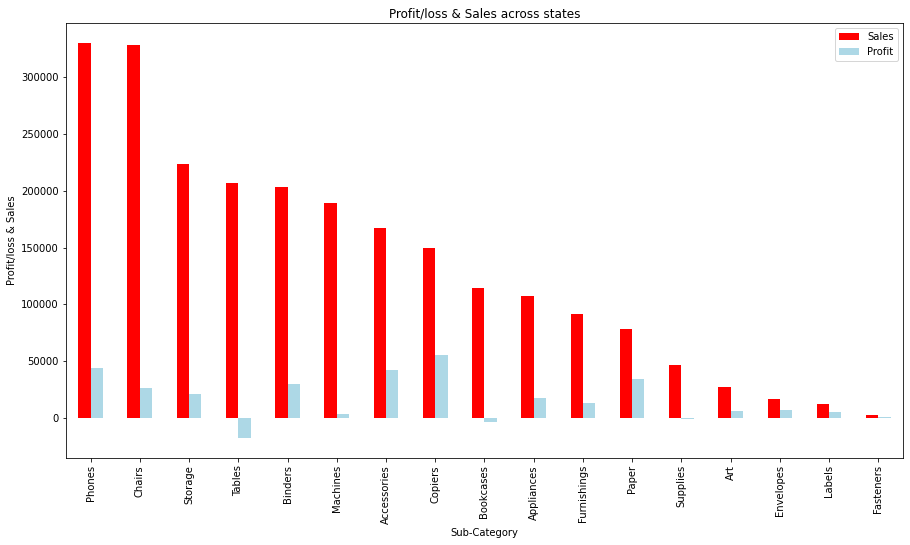

In [56]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

#Phones sub-category have high sales and Tables and Bookmarks sub-categories facing huge loss.